In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/claims_data.csv')
df

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188313,587620,A,B,A,A,A,A,A,A,B,...,0.242437,0.289949,0.24564,0.30859,0.32935,0.223038,0.220003,0.333292,0.208216,1198.62
188314,587624,A,A,A,A,A,B,A,A,A,...,0.334270,0.382000,0.63475,0.40455,0.47779,0.307628,0.301921,0.318646,0.305872,1108.34
188315,587630,A,B,A,A,A,A,A,B,B,...,0.345883,0.370534,0.24564,0.45808,0.47779,0.445614,0.443374,0.339244,0.503888,5762.64
188316,587632,A,B,A,A,A,A,A,A,B,...,0.704364,0.562866,0.34987,0.44767,0.53881,0.863052,0.852865,0.654753,0.721707,1562.87


In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_columns)
y = df_encoded["loss"]
X = df_encoded.drop(columns=['id', 'loss'], axis=1)
# X
# y

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression


selector = SelectKBest(score_func=f_regression, k=10)
X_selected = selector.fit_transform(X, y)


selected_indices = selector.get_support(indices=True)

selected_features = X.columns[selected_indices]
print("Selected Features:", selected_features)

X_kbest = X[selected_features]

Selected Features: Index(['cat10_B', 'cat12_A', 'cat12_B', 'cat57_A', 'cat57_B', 'cat79_B',
       'cat79_D', 'cat80_B', 'cat80_D', 'cat87_B'],
      dtype='object')


In [ ]:

categorical_columns = df.select_dtypes(include=['object', 'category']).columns

for column in categorical_columns:
    mean_loss = df.groupby(column)['loss'].mean().reset_index()


    plt.figure(figsize=(10, 6))
    sns.barplot(x=column, y='loss', data=mean_loss, color='lightblue', label='Mean Loss')


    sns.lineplot(x=column, y='loss', data=df, color='red', marker='o', label='Actual Loss')

    plt.title(f'Bar Graph of Mean Loss with Actual Loss Line for {column}')
    plt.legend()
    plt.xticks(rotation=45)  # Rotate x-axis labels if needed
    plt.show()





Output hidden; open in https://colab.research.google.com to view.

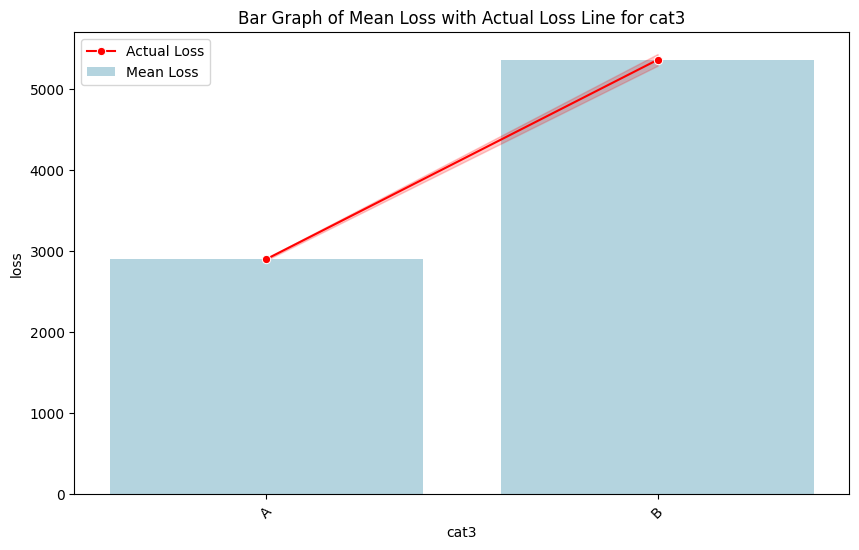

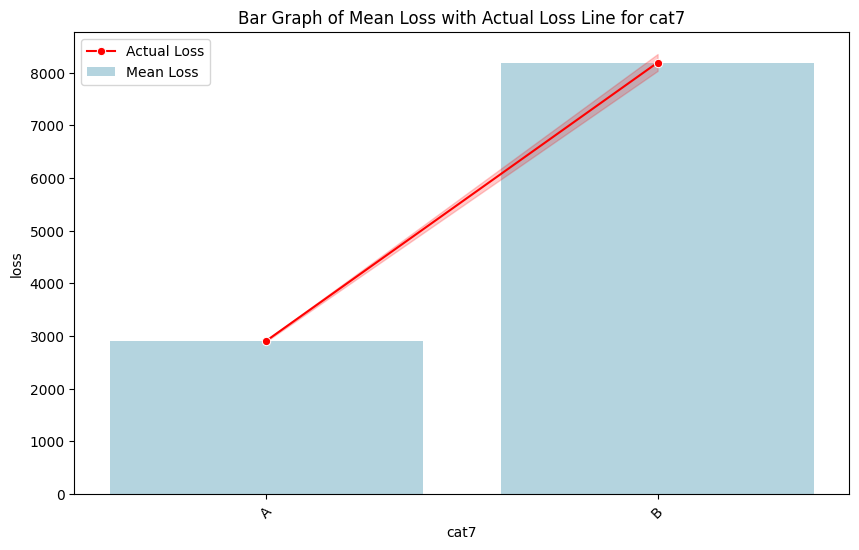

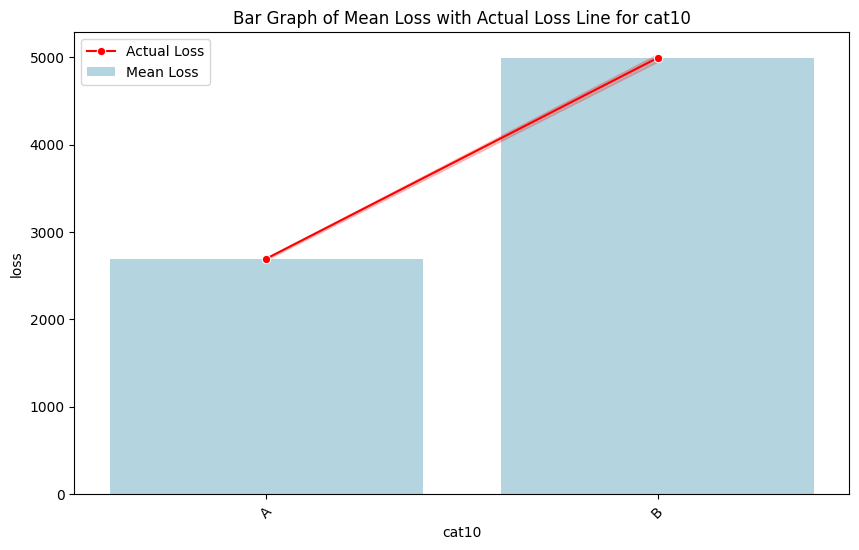

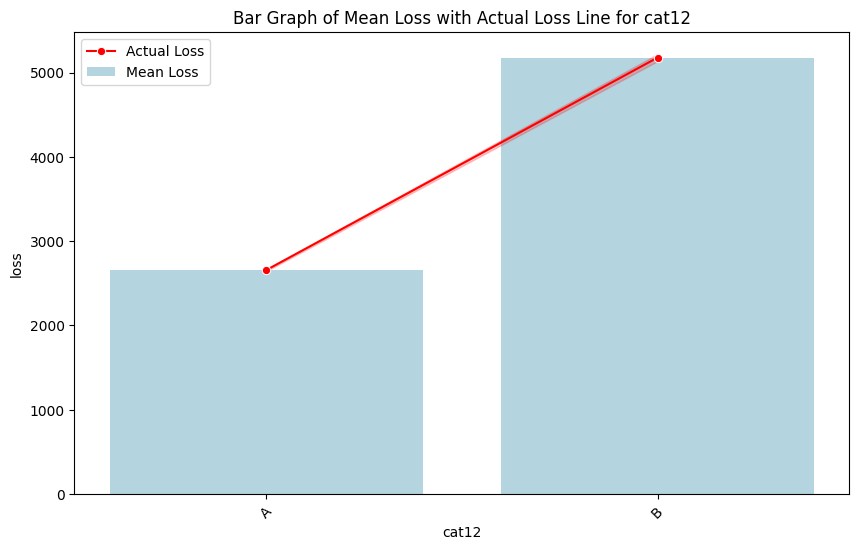

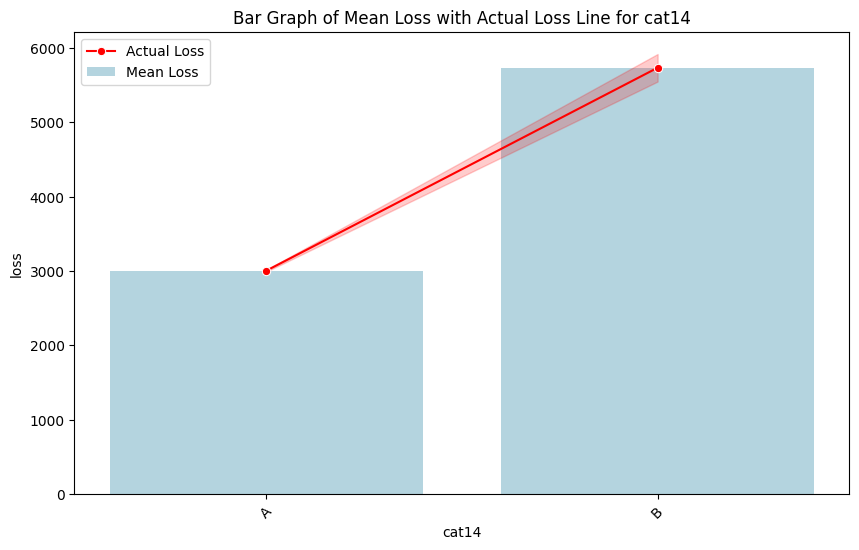

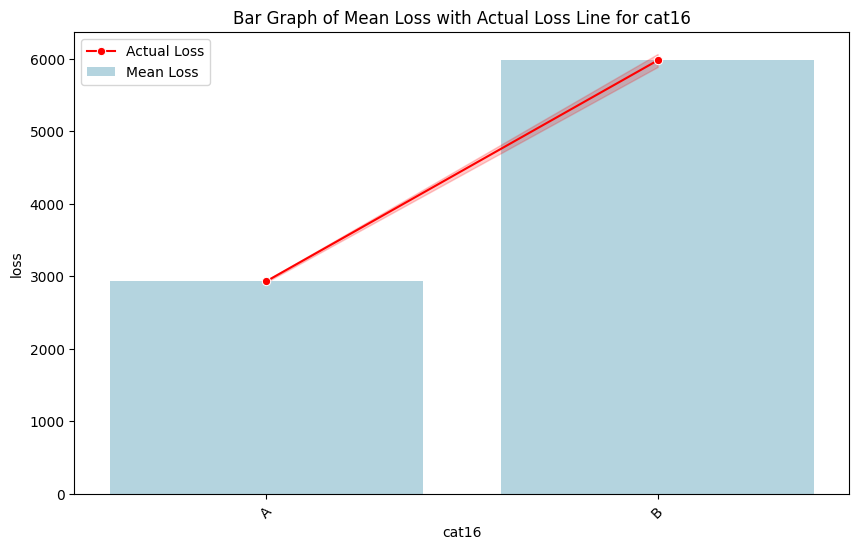

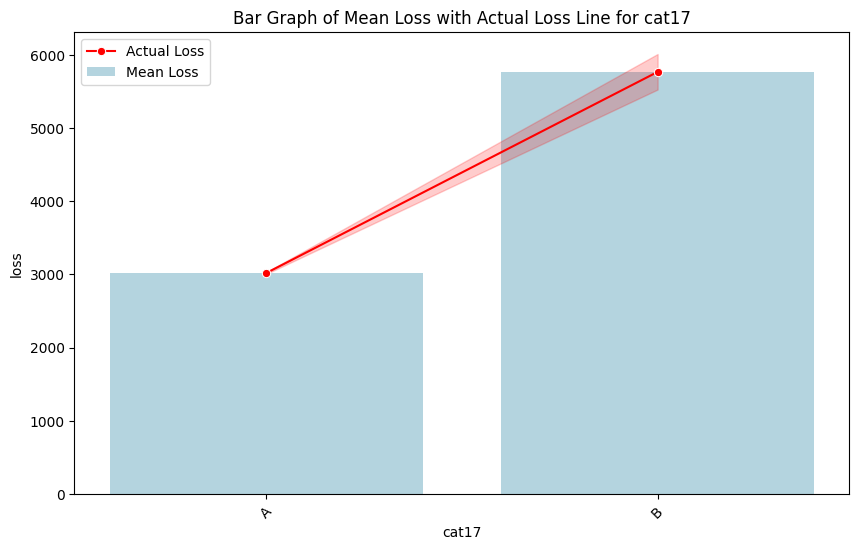

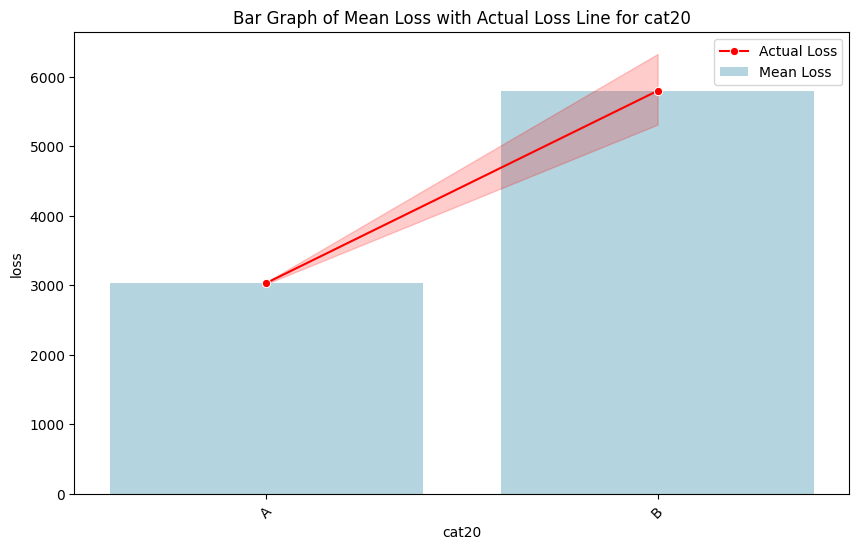

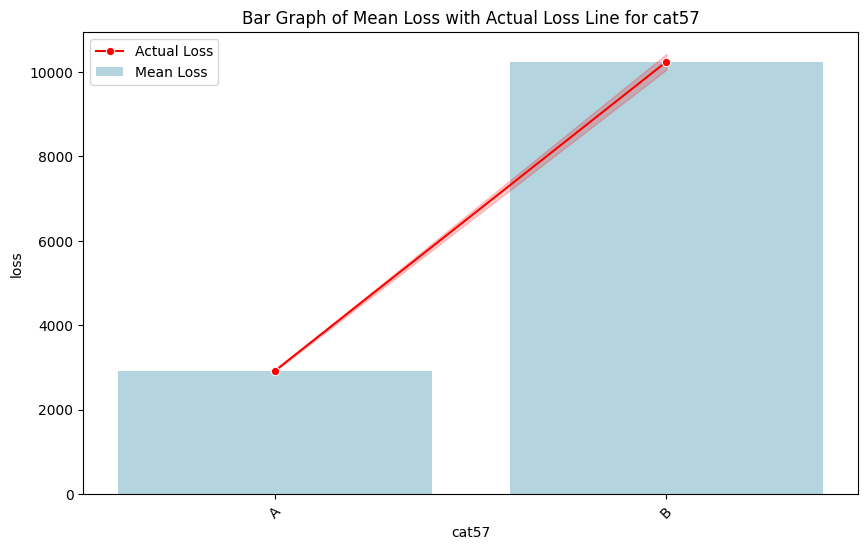

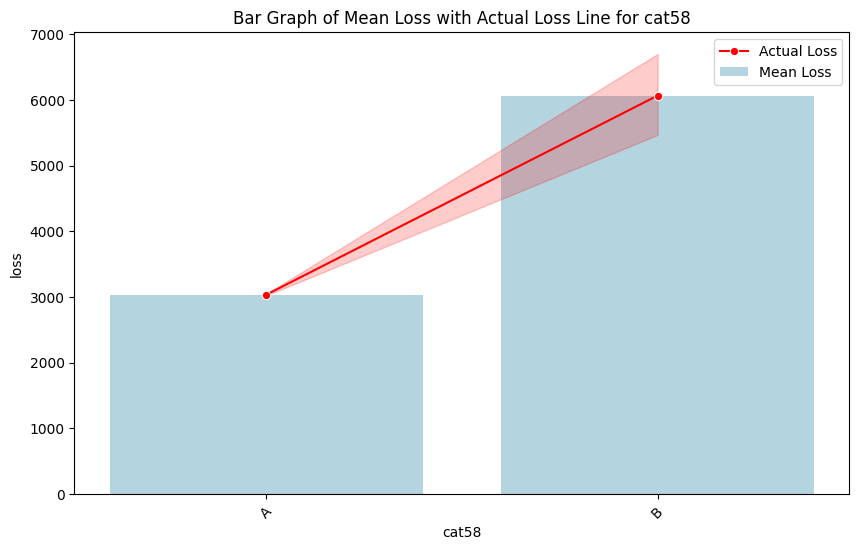

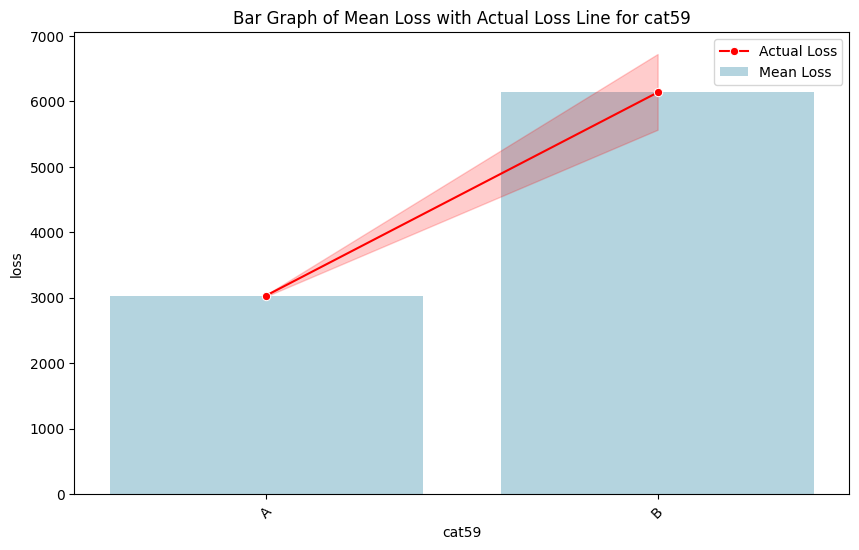

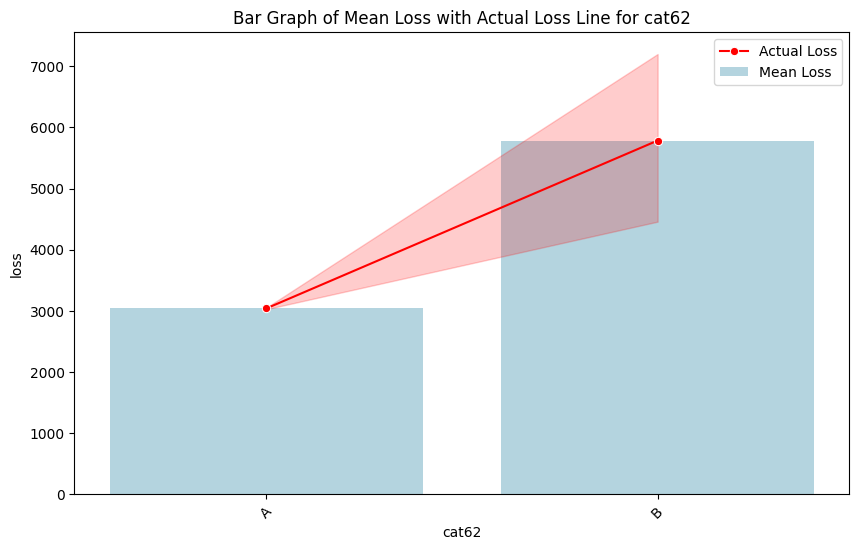

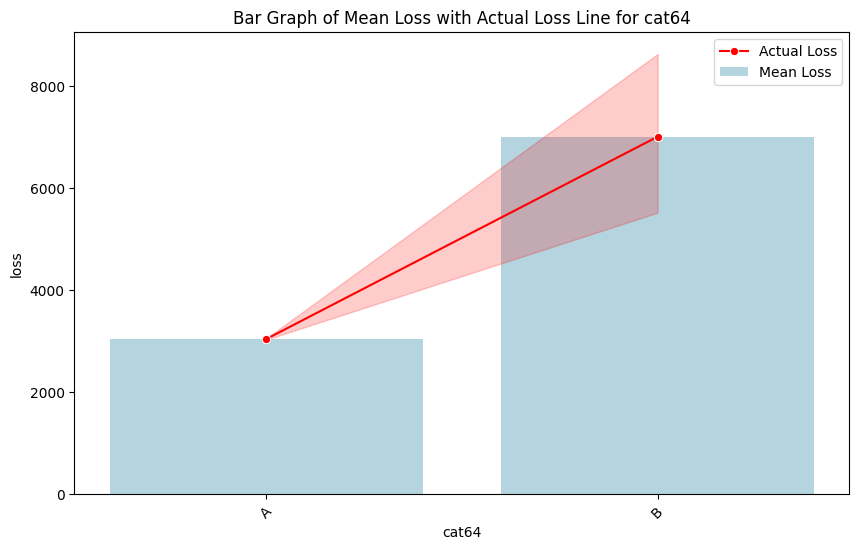

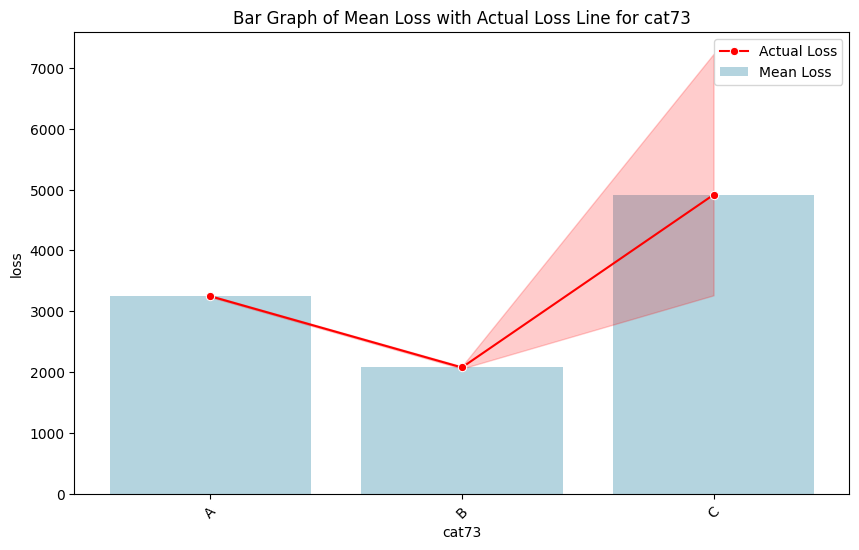

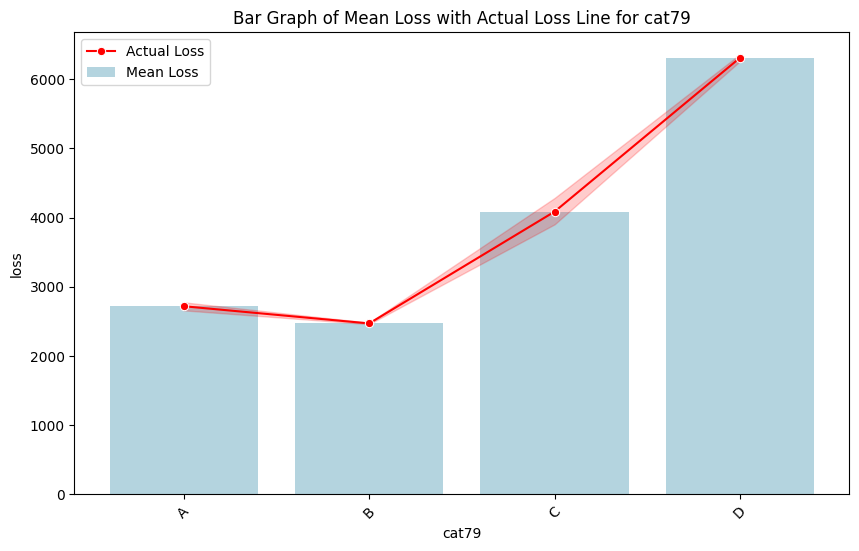

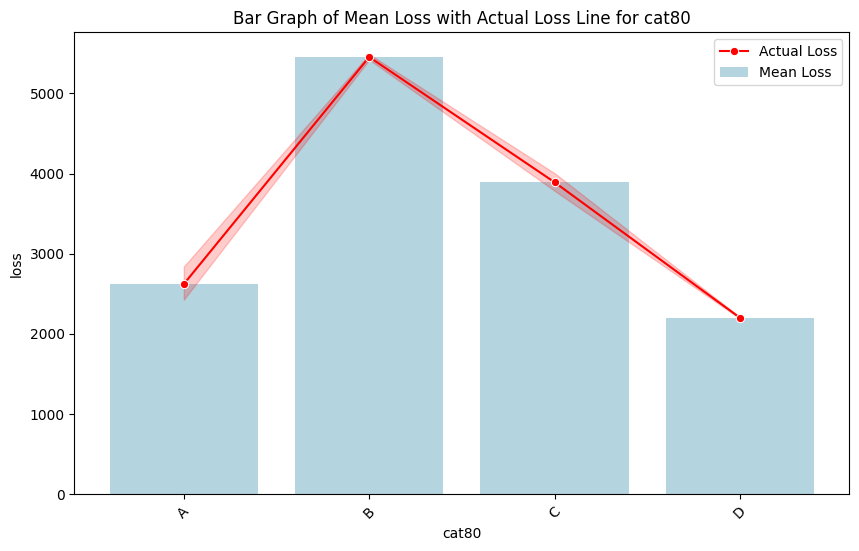

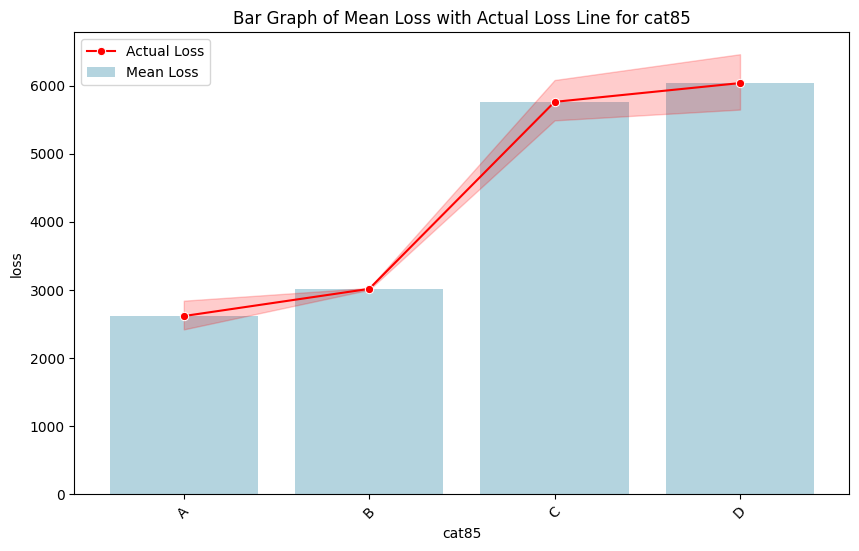

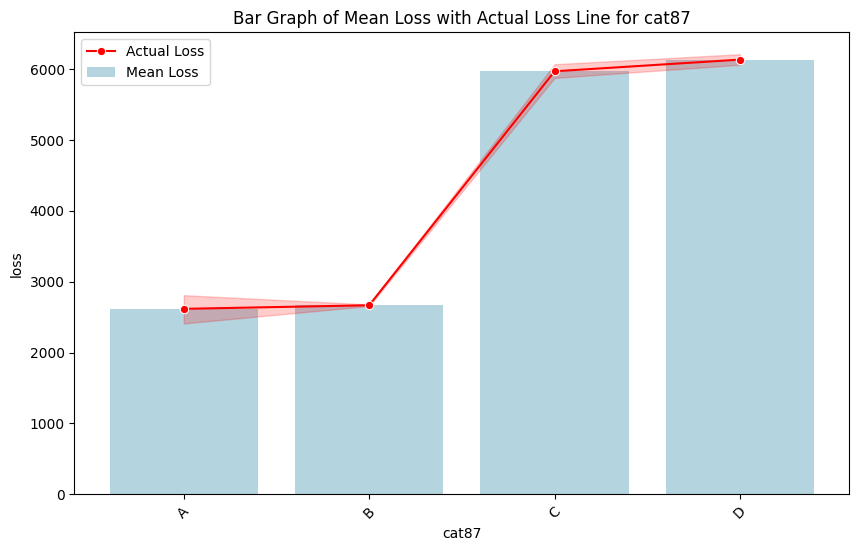

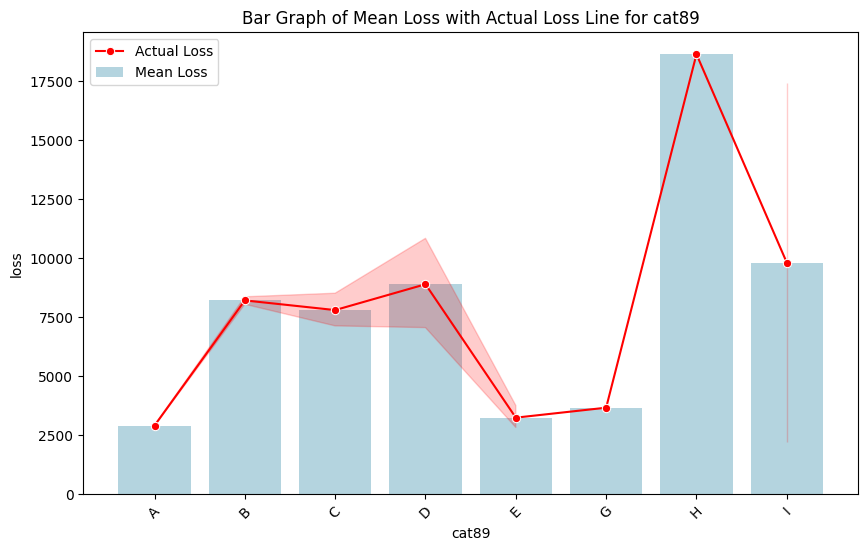

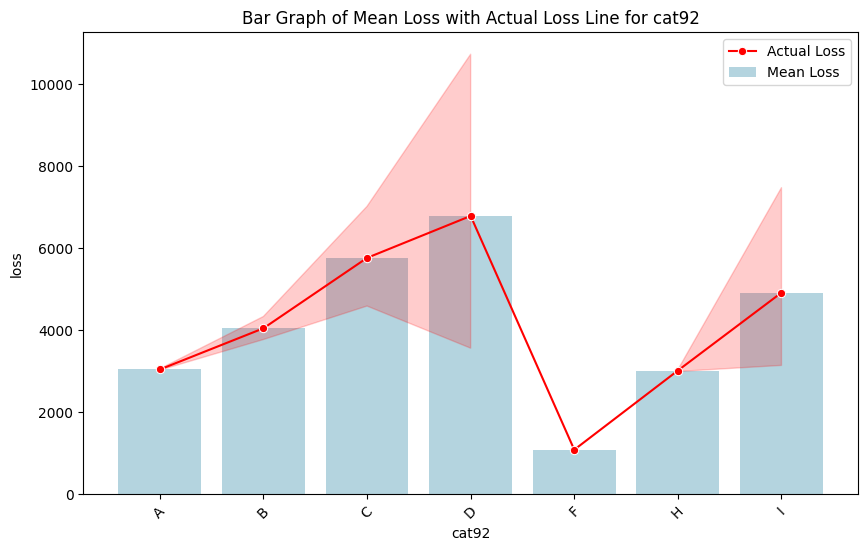

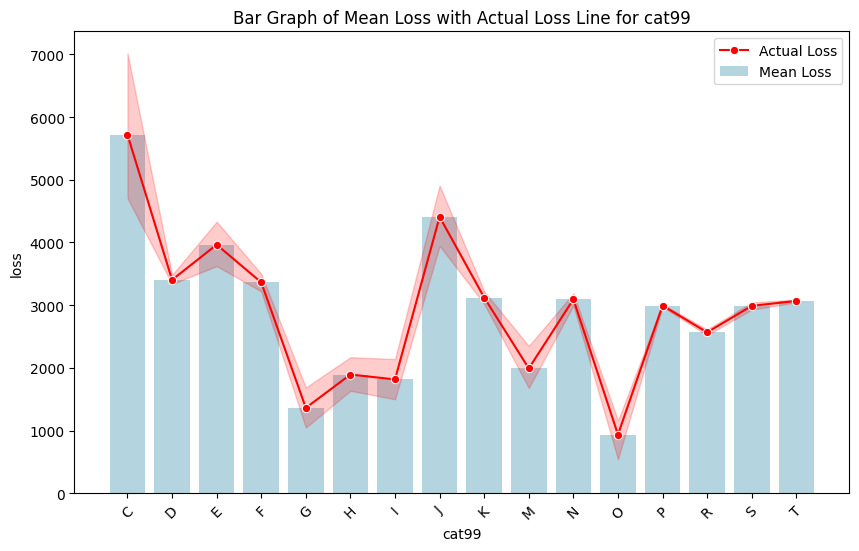

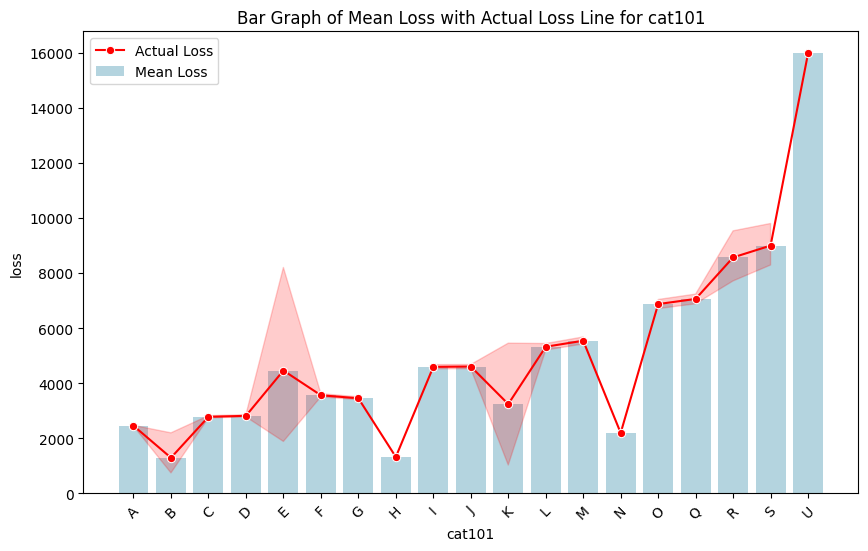

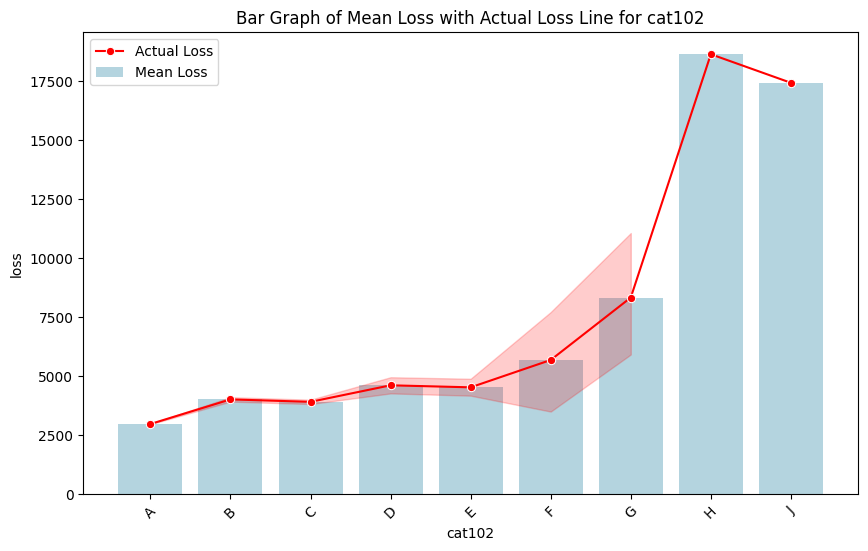

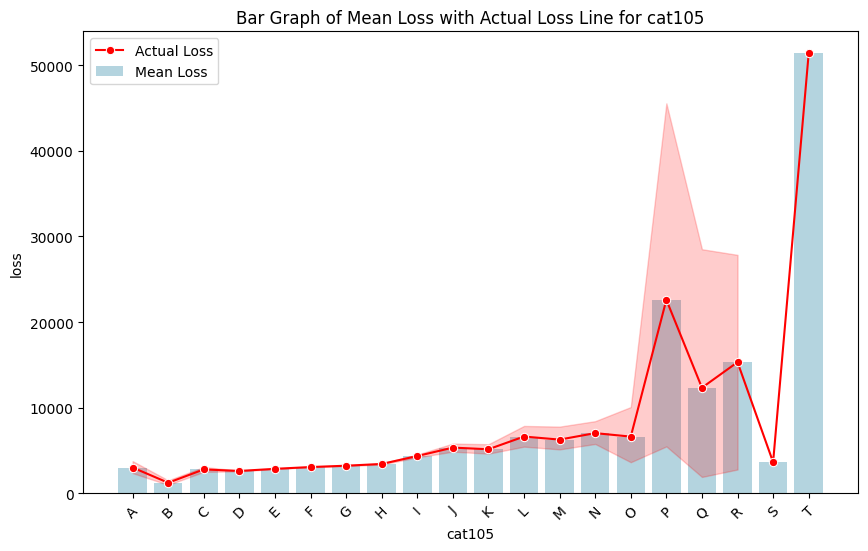

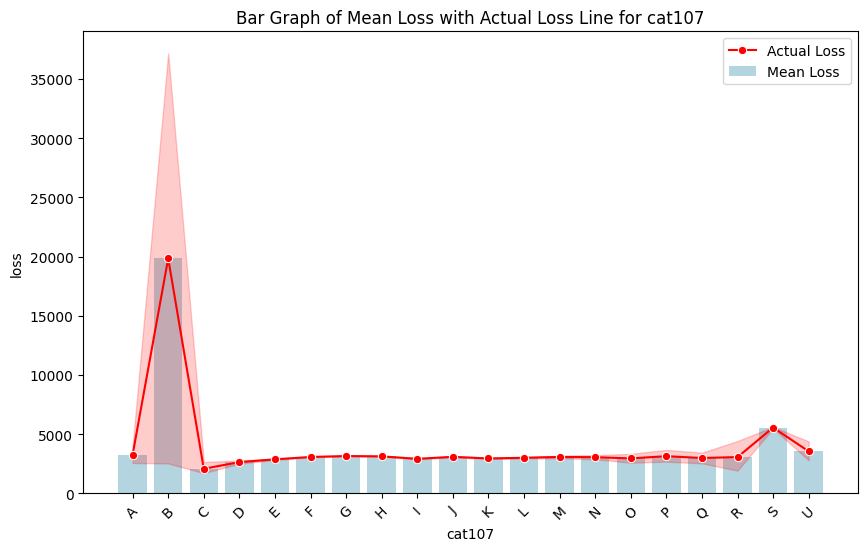

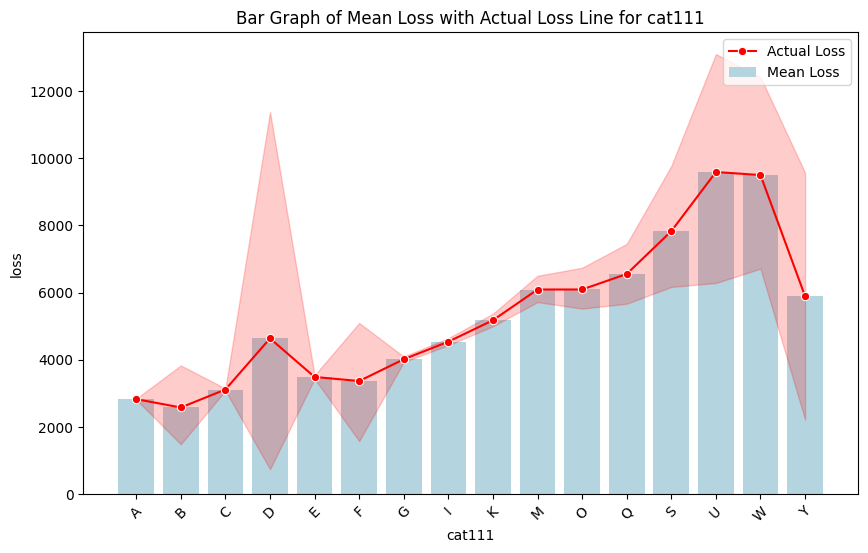

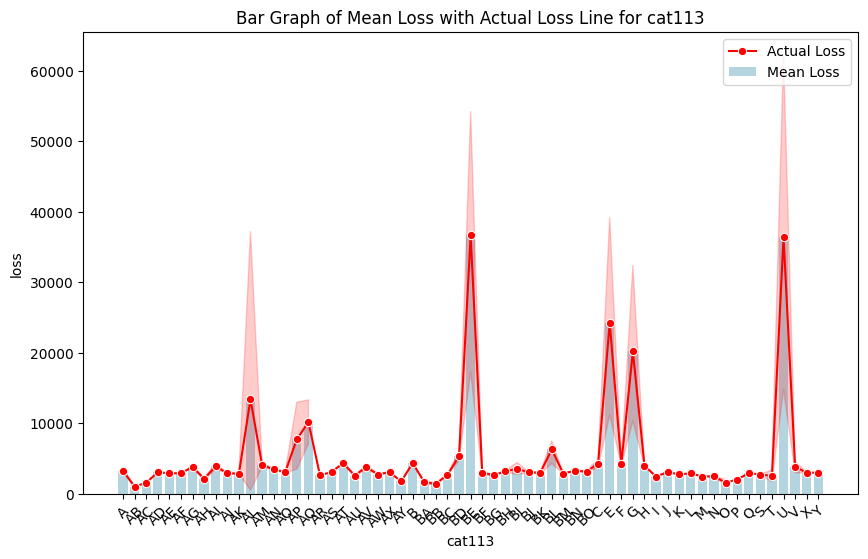

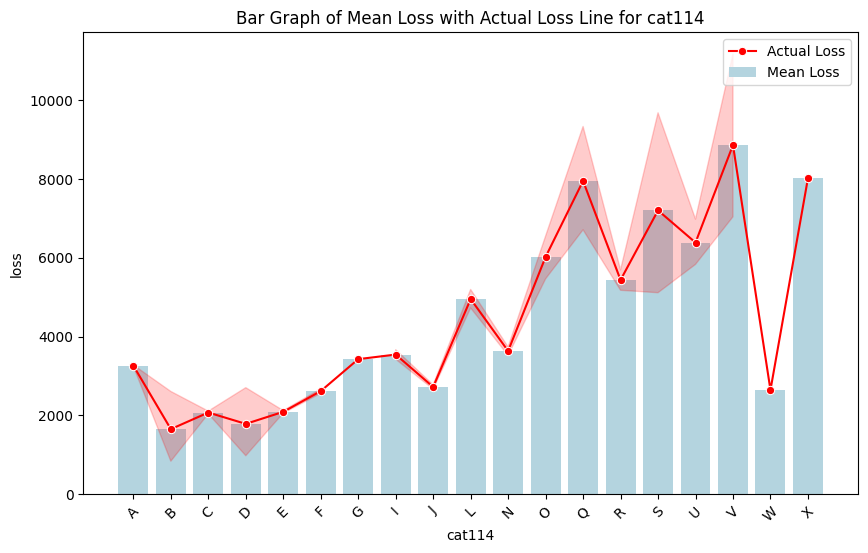

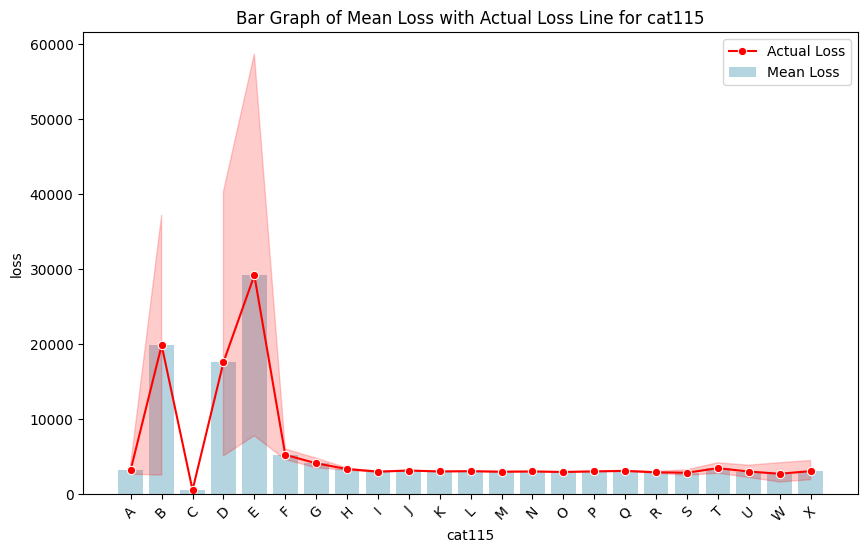

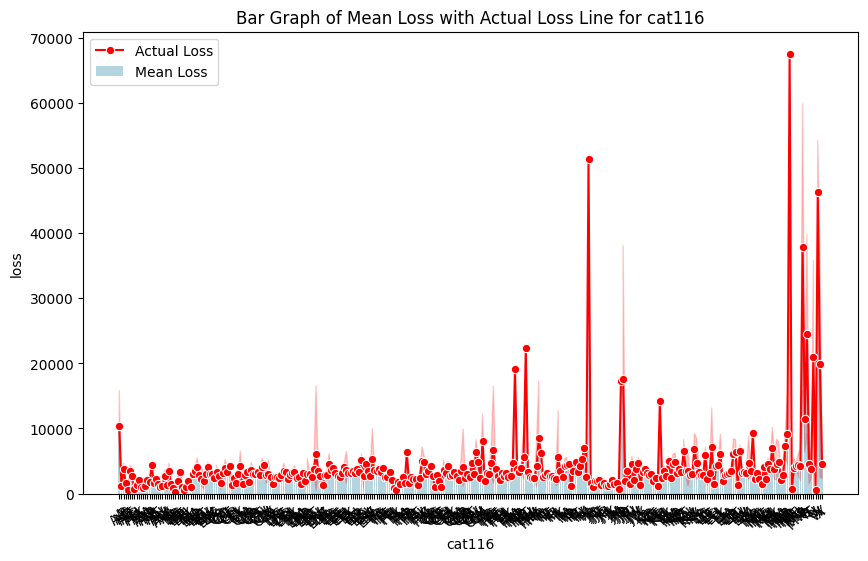

Categorical columns with significant differences in mean loss:
['cat3', 'cat7', 'cat10', 'cat12', 'cat14', 'cat16', 'cat17', 'cat20', 'cat57', 'cat58', 'cat59', 'cat62', 'cat64', 'cat73', 'cat79', 'cat80', 'cat85', 'cat87', 'cat89', 'cat92', 'cat99', 'cat101', 'cat102', 'cat105', 'cat107', 'cat111', 'cat113', 'cat114', 'cat115', 'cat116']


In [ ]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

significant_difference_columns = []

for column in categorical_columns:

    mean_loss = df.groupby(column)['loss'].mean().reset_index()


    mean = mean_loss['loss'].mean()
    std_dev = mean_loss['loss'].std()
    cv = std_dev / mean if mean != 0 else 0

    threshold = 0.4

    if cv > threshold:
        significant_difference_columns.append(column)

        plt.figure(figsize=(10, 6))
        sns.barplot(x=column, y='loss', data=mean_loss, color='lightblue', label='Mean Loss')

        sns.lineplot(x=column, y='loss', data=df, color='red', marker='o', label='Actual Loss')

        plt.title(f'Bar Graph of Mean Loss with Actual Loss Line for {column}')
        plt.legend()
        plt.xticks(rotation=45)
        plt.show()


print("Categorical columns with significant differences in mean loss:")
print(significant_difference_columns)


In [ ]:
columns_to_cluster = ["cat89", "cat92","cat99","cat101", "cat102", "cat105", "cat107",'cat109', 'cat110',"cat111",'cat112', 'cat113', 'cat114', 'cat115', 'cat116']

new_columns = [col for col in significant_difference_columns if col not in columns_to_cluster]

print("Categorical columns with significant differences in mean loss to use:")
new_columns



Categorical columns with significant differences in mean loss to use:


['cat3',
 'cat7',
 'cat10',
 'cat12',
 'cat14',
 'cat16',
 'cat17',
 'cat20',
 'cat57',
 'cat58',
 'cat59',
 'cat62',
 'cat64',
 'cat73',
 'cat79',
 'cat80',
 'cat85',
 'cat87']

In [ ]:
number_of_columns=len(new_columns)

number_of_columns

18

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

def encode_and_cluster(df, column_name, n_clusters=5):
    le = LabelEncoder()
    df[f'{column_name}_encoded'] = le.fit_transform(df[column_name])

    kmeans = KMeans(n_clusters=n_clusters)
    df[f'{column_name}_cluster'] = kmeans.fit_predict(df[[f'{column_name}_encoded']])

    df[f'{column_name}_grouped'] = df[f'{column_name}_cluster'].map(lambda x: f'Group{x}')

    return df



columns_to_cluster = ["cat89", "cat92","cat99","cat101", "cat102", "cat105", "cat107",'cat109', 'cat110',"cat11",'cat112', 'cat113', 'cat114', 'cat115', 'cat116']


for column in columns_to_cluster:
    df = encode_and_cluster(df, column, n_clusters=5)


for column in columns_to_cluster:
    grouped_column = f'{column}_grouped'
    print(f"\nDistribution of {column} groups:")
    print(df[grouped_column].value_counts())




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex


Distribution of cat89 groups:
cat89_grouped
Group0    183744
Group1      4312
Group3       220
Group2        38
Group4         4
Name: count, dtype: int64

Distribution of cat92 groups:
cat92_grouped
Group1    124689
Group0     62902
Group2       628
Group3        73
Group4        26
Name: count, dtype: int64

Distribution of cat99 groups:
cat99_grouped
Group3    79458
Group2    72591
Group0    17335
Group1    13002
Group4     5932
Name: count, dtype: int64

Distribution of cat101 groups:
cat101_grouped
Group0    106724
Group4     34149
Group2     21084
Group3     13951
Group1     12410
Name: count, dtype: int64

Distribution of cat102 groups:
cat102_grouped
Group0    177274
Group2      5155
Group1      4929
Group3       511
Group4       449
Name: count, dtype: int64

Distribution of cat105 groups:
cat105_grouped
Group0    76493
Group3    62892
Group1    31871
Group4    12529
Group2     4533
Name: count, dtype: int64

Distribution of cat107 groups:
cat107_grouped
Group2    75870
Group

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

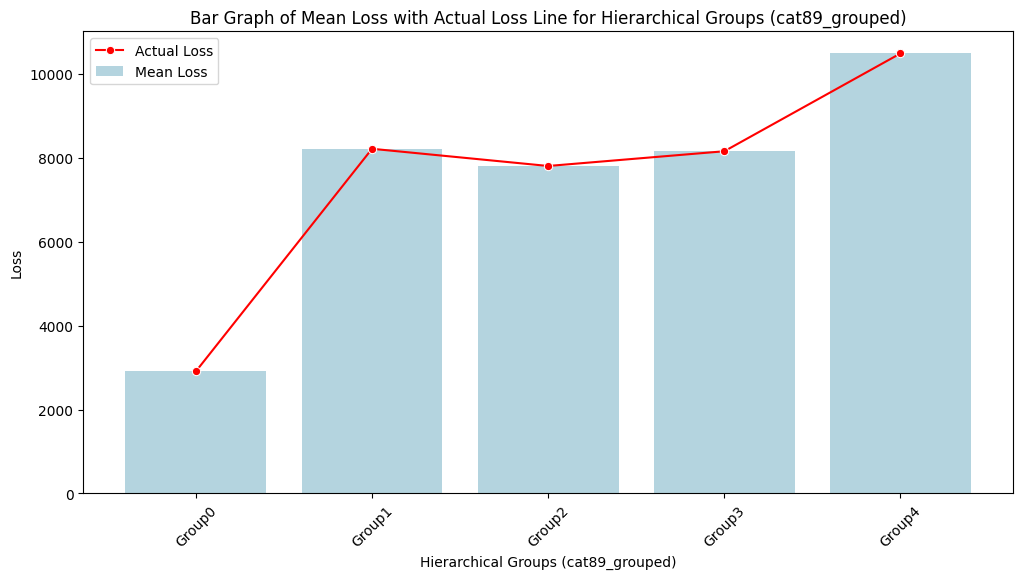

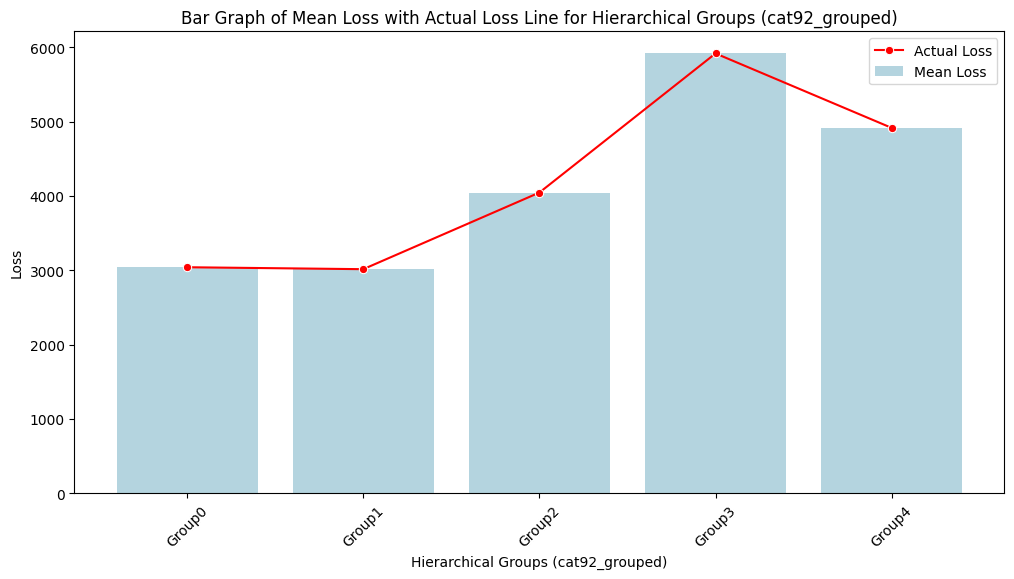

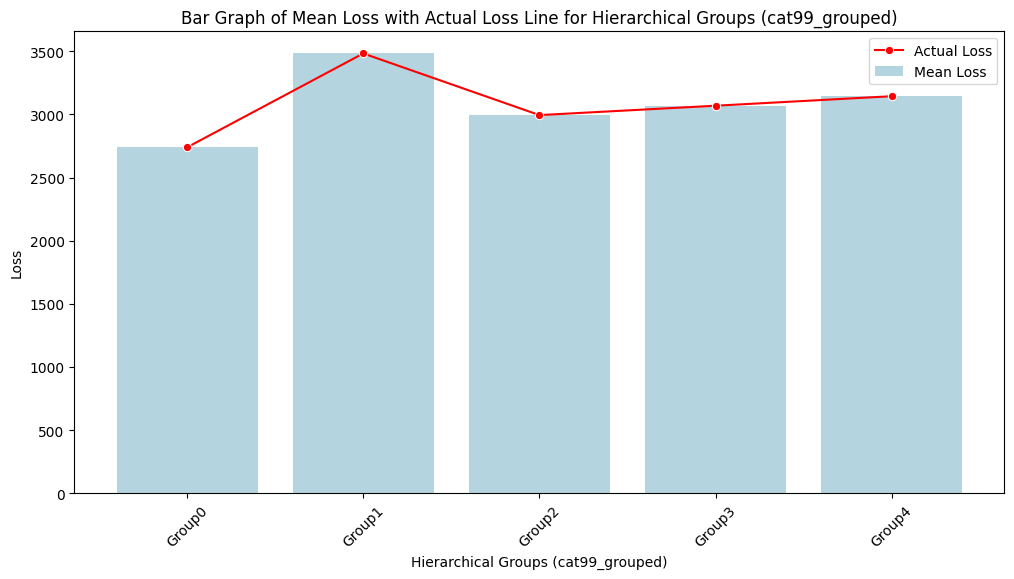

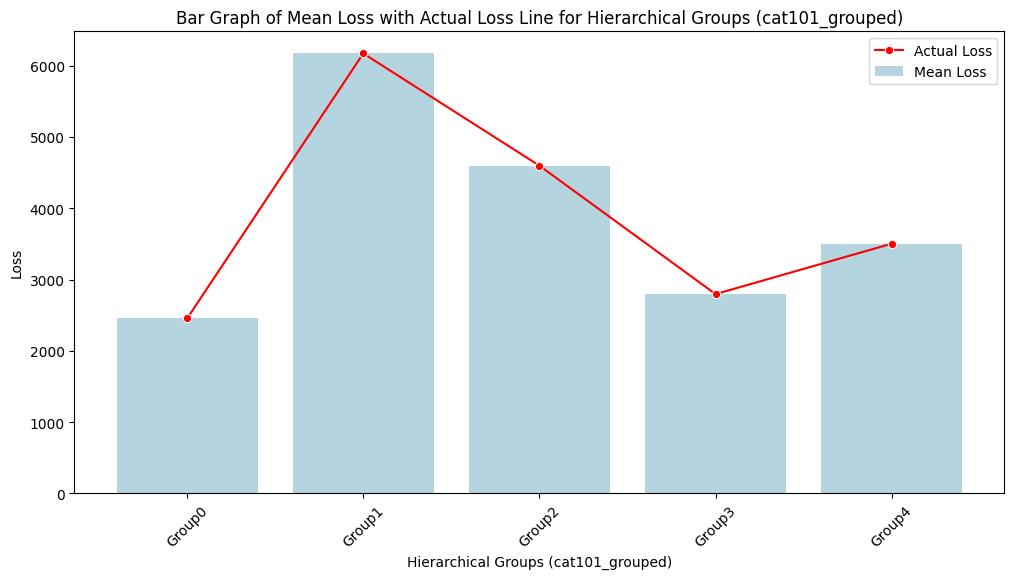

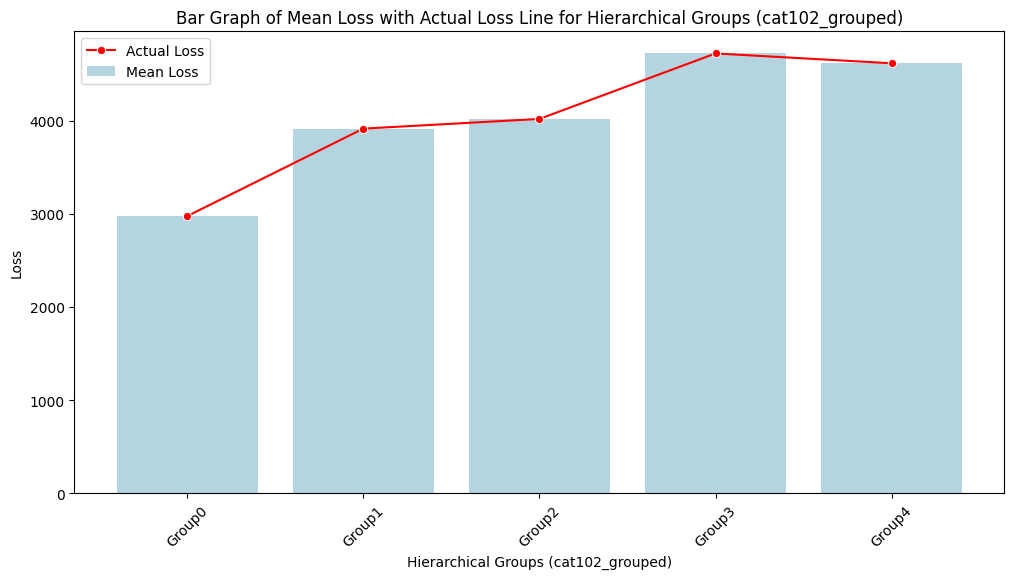

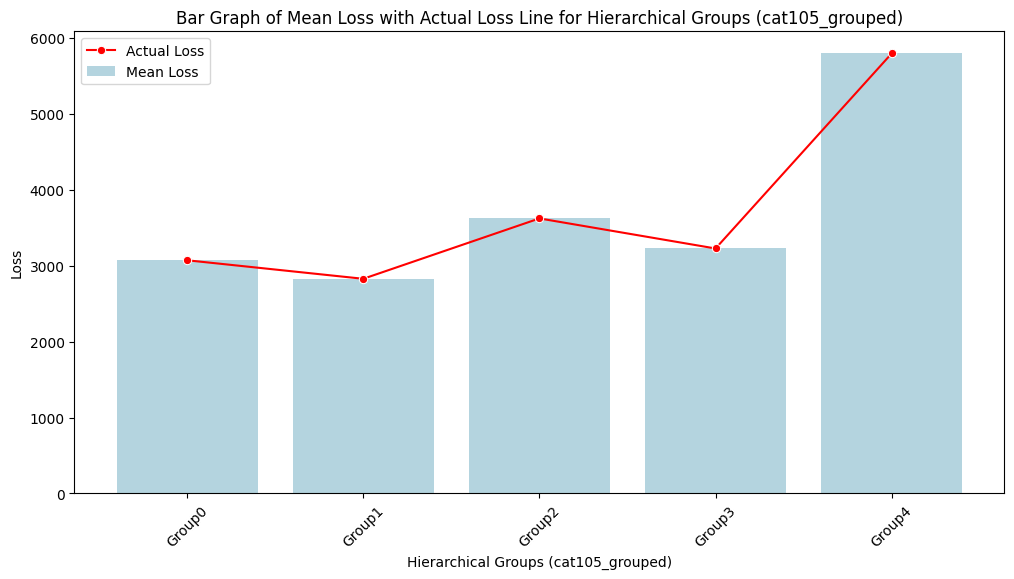

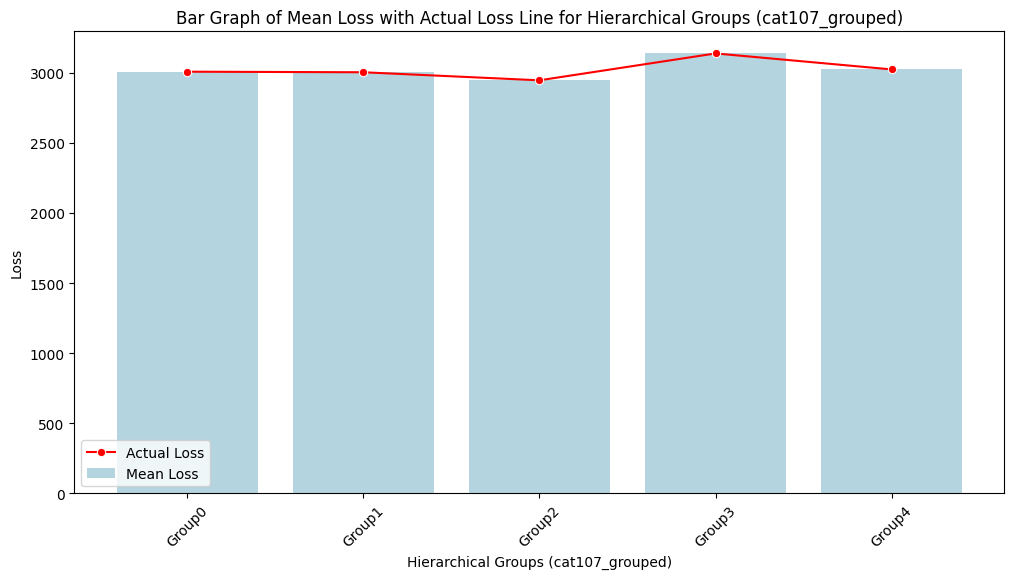

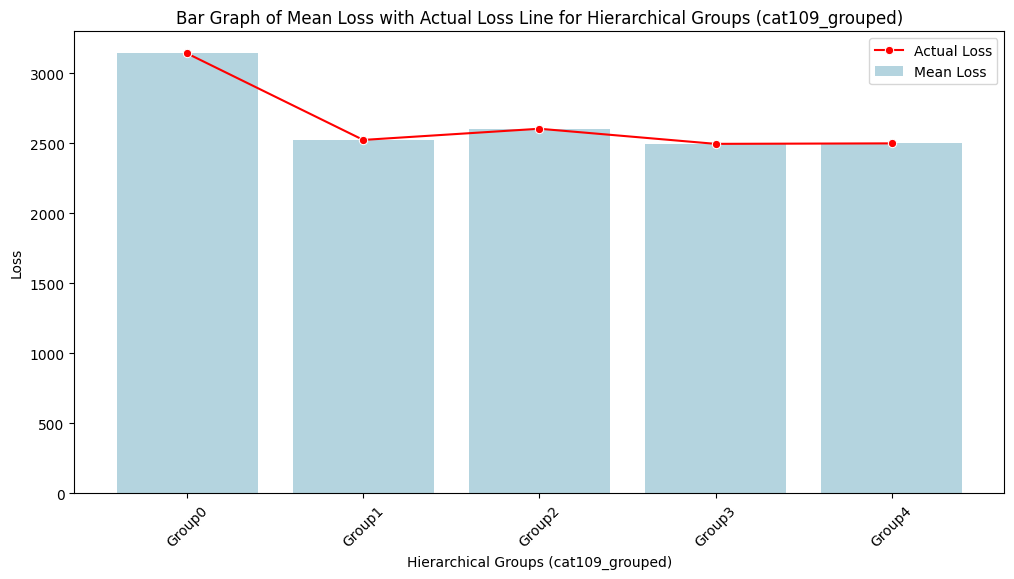

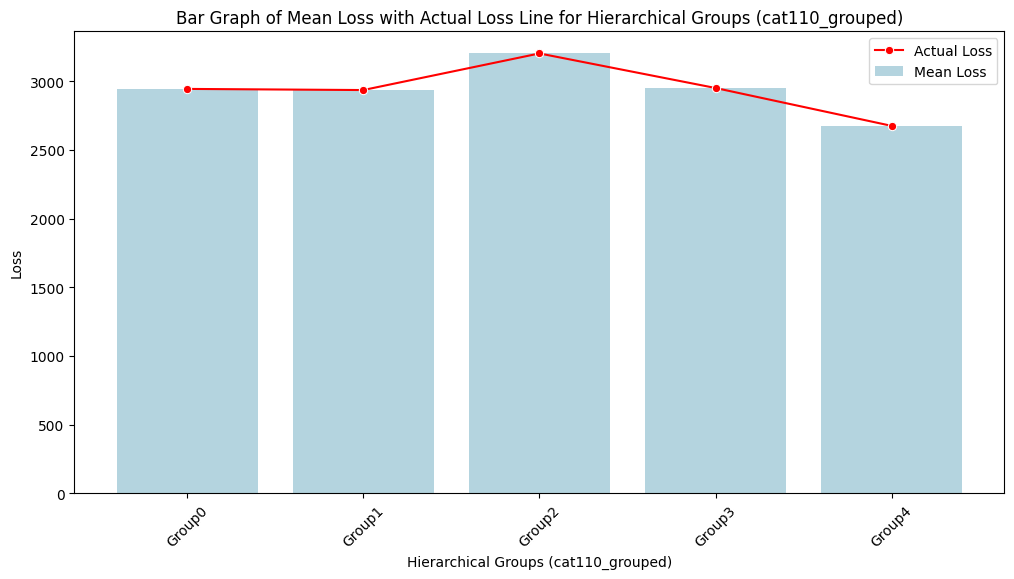

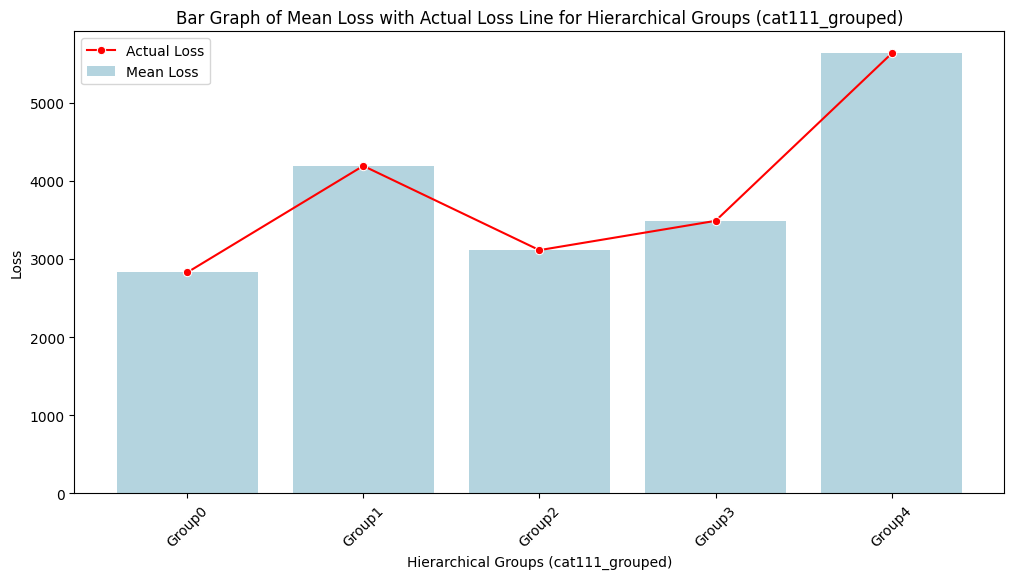

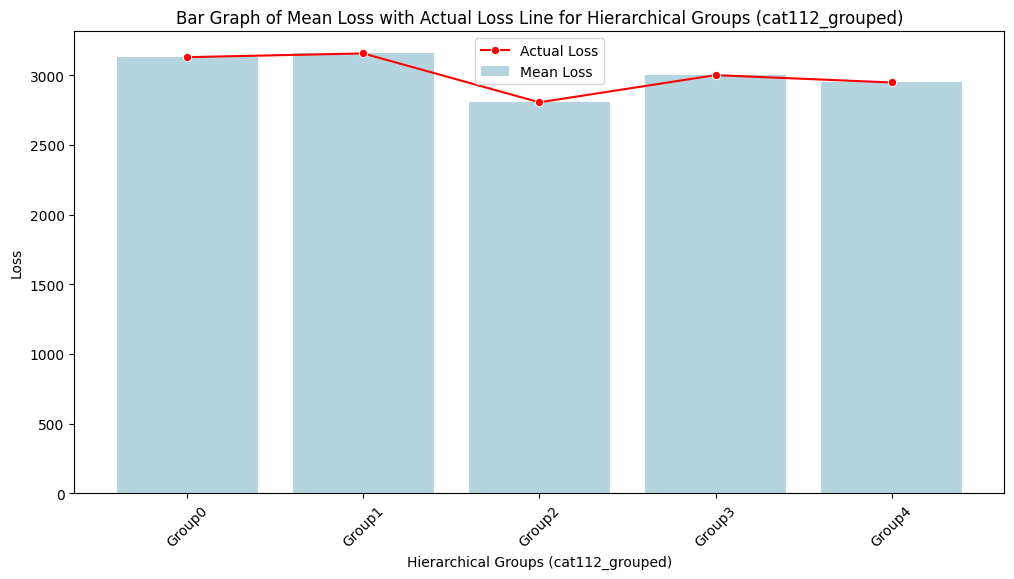

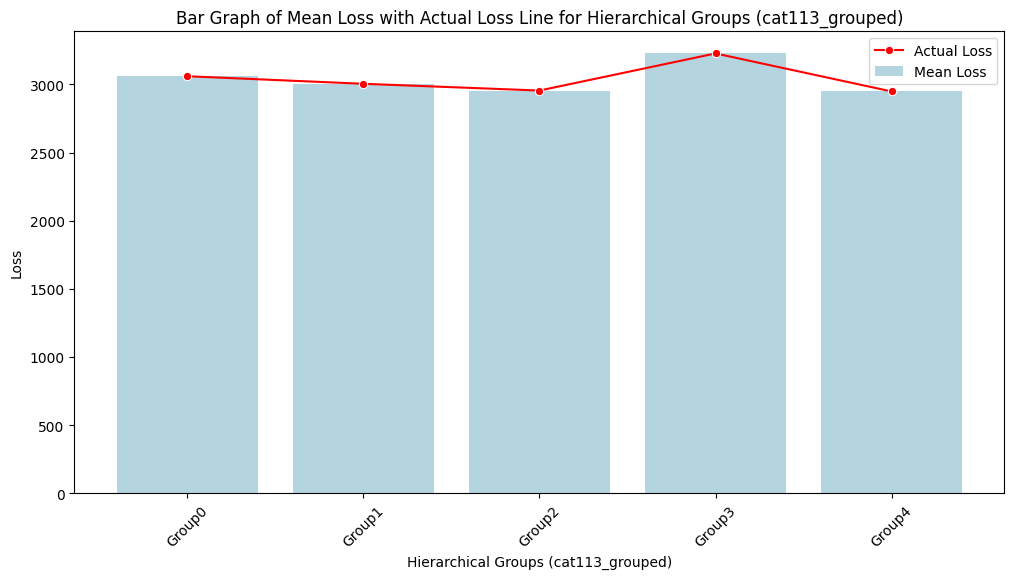

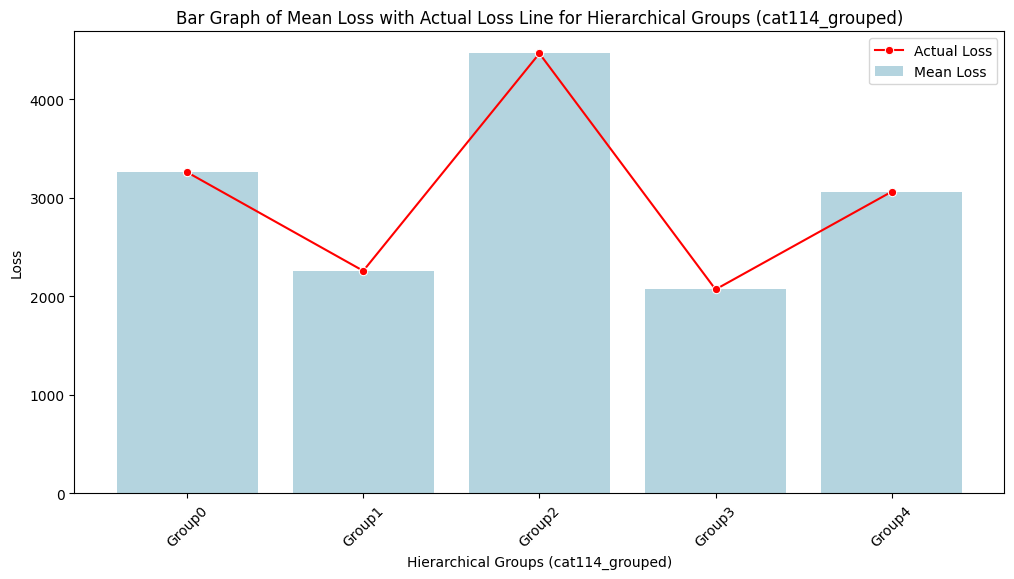

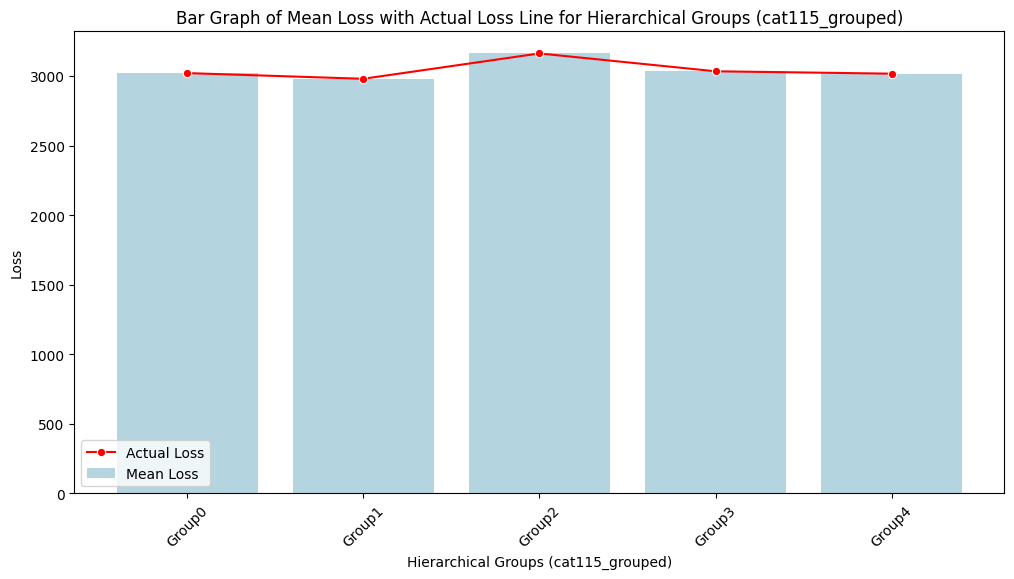

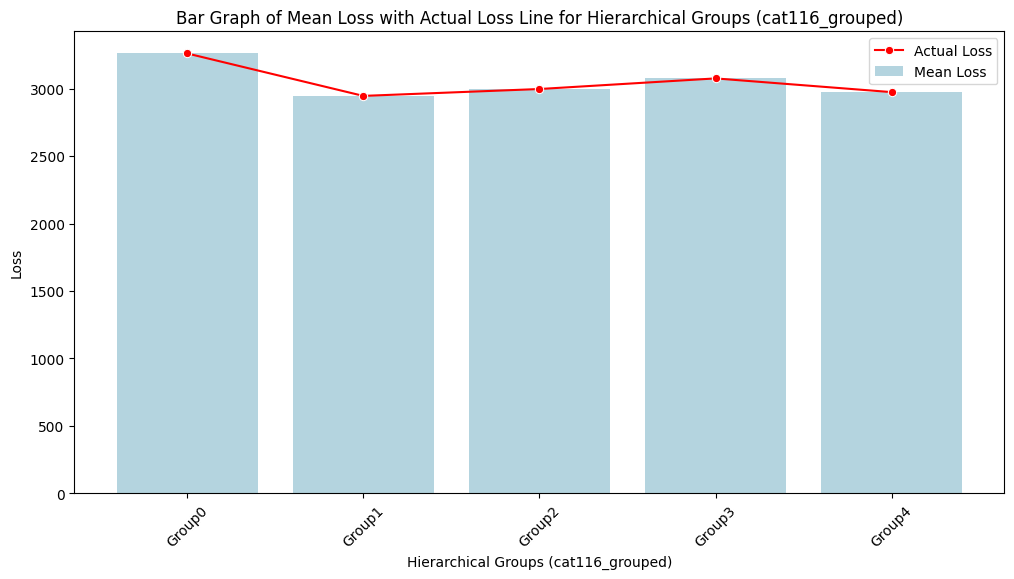

In [ ]:
def plot_mean_loss_by_group(df, grouped_column):

    mean_loss = df.groupby(grouped_column)['loss'].mean().reset_index()


    plt.figure(figsize=(12, 6))

    sns.barplot(x=grouped_column, y='loss', data=mean_loss, color='lightblue', label='Mean Loss')


    sns.lineplot(x=grouped_column, y='loss', data=mean_loss, color='red', marker='o', label='Actual Loss')


    plt.title(f'Bar Graph of Mean Loss with Actual Loss Line for Hierarchical Groups ({grouped_column})')
    plt.xlabel(f'Hierarchical Groups ({grouped_column})')
    plt.ylabel('Loss')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

def encode_and_cluster(df, column_name, n_clusters=5):
    le = LabelEncoder()
    df[f'{column_name}_encoded'] = le.fit_transform(df[column_name])

    kmeans = KMeans(n_clusters=n_clusters)
    df[f'{column_name}_cluster'] = kmeans.fit_predict(df[[f'{column_name}_encoded']])

    df[f'{column_name}_grouped'] = df[f'{column_name}_cluster'].map(lambda x: f'Group{x}')

    return df


columns_to_cluster = ["cat89", "cat92", "cat99", "cat101", "cat102", "cat105", "cat107", 'cat109', 'cat110', "cat111", 'cat112', 'cat113', 'cat114', 'cat115', 'cat116']

for column in columns_to_cluster:
    df = encode_and_cluster(df, column, n_clusters=5)


for column in columns_to_cluster:
    grouped_column = f'{column}_grouped'
    if grouped_column in df.columns:
        plot_mean_loss_by_group(df, grouped_column)

In [ ]:
grouped_cat = ["cat92_grouped","cat101_grouped","cat111_grouped","cat114_grouped"]
columns_to_include = new_columns + grouped_cat
columns_to_include

['cat3',
 'cat7',
 'cat10',
 'cat12',
 'cat14',
 'cat16',
 'cat17',
 'cat20',
 'cat57',
 'cat58',
 'cat59',
 'cat62',
 'cat64',
 'cat73',
 'cat79',
 'cat80',
 'cat85',
 'cat87',
 'cat92_grouped',
 'cat101_grouped',
 'cat111_grouped',
 'cat114_grouped']

* Include cat92_grouped, cat101_grouped,cat111_grouped, and cat114_grouped, becuase these grouped categories have a lot of variance
* all the other categorical variables that used catergorical grouping did not have a high variance
* for the continuous columns use confusion matrix and /or feature selection to determine which ones to use